In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imsave, imread
import imageio as iio

In [2]:
os.getcwd()

'/home/pi'

In [3]:
os.listdir('/home/pi/Desktop/2021_01_07_DS_ok6/')

['tg_pre_light_002.mp4',
 'tg_post_light_002.mp4',
 'wt_pre_light_002.mp4',
 'wt_post_light_001.mp4',
 'wt_pre_light_001.mp4',
 'tg_pre_light_001.mp4',
 'tg_post_light_001.mp4',
 'wt_post_light_002.mp4']

In [4]:
files = os.listdir('/home/pi/Desktop/2021_01_07_DS_ok6/')

In [5]:
root_dir_path = '/home/pi/Desktop/2021_01_07_DS_ok6/'

In [115]:
filename = files[4]

In [119]:
reader = iio.get_reader(root_dir_path + filename)
image = reader.get_data(200)
reader.close()

In [120]:
image.shape

(1080, 1920, 3)

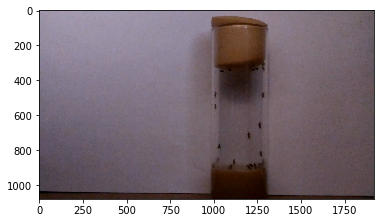

In [121]:
plt.imshow(image)

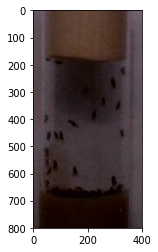

In [80]:
plt.imshow(image[200:1000, 950:1350])

In [81]:
vial = image[200:1000, 950:1350]

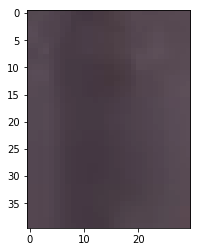

In [101]:
plt.imshow(vial[280:320, 350:380])

In [103]:
bkgr_template = vial[480:520, 185:215]
bkgr_template2 = vial[280:320, 350:380]

In [40]:
from skimage.feature import match_template

In [39]:
fly_template = image[630:670, 955:985]

In [50]:
fly_template2 = vial[470:510, 75:105]

In [104]:
fly_result = match_template(image=vial, template=fly_template)
fly_result2 = match_template(image=vial, template=fly_template2)

bkgr_result = match_template(image=vial, template=bkgr_template)
bkgr_result2 = match_template(image=vial, template=bkgr_template2) 

In [105]:
fly_mean_results = (fly_result[...,0] + fly_result2[..., 0])/2
bkgr_mean_results = (bkgr_result[...,0] + bkgr_result2[..., 0])/2

bkgr_corrected = fly_mean_results - bkgr_mean_results

In [106]:
bkgr_corrected.shape

(761, 371)

In [62]:
overlayed_results.min()

-0.8415817200633131

In [66]:
from skimage.feature import peak_local_max

In [111]:
peak_coords = peak_local_max(bkgr_corrected, min_distance=25, threshold_abs=0)

In [95]:
peak_coords[:,1]

array([302,  37, 281, 139,  45, 345,  67,  37, 345,  37, 345,  90,  44,
        69, 312,  34, 210, 346, 346, 345, 297, 346, 243, 347, 347, 347,
       347, 280, 347, 347, 347, 314, 348, 348, 348, 349, 349], dtype=int32)

In [112]:
peak_coords

array([[657, 200],
       [645, 270],
       [641, 145],
       [616,  36],
       [605, 279],
       [571, 137],
       [571,  43],
       [537,  36],
       [502,  34],
       [442,  42],
       [432, 310],
       [399, 134],
       [379,  32],
       [368, 207],
       [333, 295],
       [315, 242],
       [308,  71],
       [252, 278],
       [204, 312],
       [174,  73],
       [159,  38]], dtype=int32)

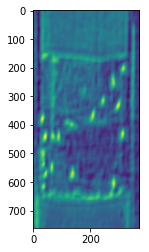

In [113]:
plt.imshow(bkgr_corrected)

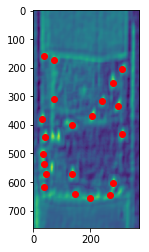

In [114]:
plt.imshow(bkgr_corrected)
plt.scatter(x=peak_coords[:,1], y=peak_coords[:,0], c='red')

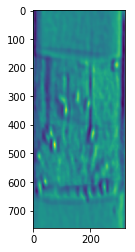

In [54]:
plt.imshow(result2[...,0])

In [45]:
two_dimensional_result = result[:,:,0]
two_dimensional_result.shape

(761, 321)

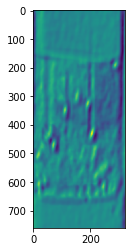

In [47]:
plt.imshow(two_dimensional_result)